<a href="https://colab.research.google.com/github/alekhya-latech/NHIS/blob/main/Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective : Prediction of Breast Cancer(BRESCAN_A) using NHIS 2021 Adult Sample dataset

Steps:
1.Removed missing/ Refused/Not ascertain/Don't know from independent variable, resulting in 3651 records

2.Removed attributes having excessive missing values(>500), resulting in 235 records

3.Calculated GINI Index of attributes, to know what are the impacting factors

4.Created bargraphs about the following attribute values in breast cancer people:

*   Gender

*   Race

*   Age

*   Hypertension
*   Smoking habit


*   Weight


*   Family POverty Ratio


5.Performed Data modeling using the below algorithms and evaluated performance using Sensitivity(recall), accuracy, precision and area under receiver operating characteristic (ROC) curve (AUC or ROC value).


*   Decision Tree

*   AdaBoost

*   Artificial neural network (ANN)


*   Logistic Regression


*   Naive Bayes




















In [ ]:
#Considering BREASCAN_A as independent variable
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/adult21.csv")
data['BREASCAN_A'] = data['BREASCAN_A'].replace({
    2: 0,
    7: None,
    9: None
})

#Remove missing/ Refused/Not ascertain/Don't know
data = data.dropna(axis=0,subset=['BREASCAN_A'])
data = data.drop('HHX', axis=1)
print("People who responded to question Breast cancer :",len(data))

#Removing attributes with more than 5000 missing attributes
remove_list = []
for i in range(len(data.columns)):
  column_name = data.columns[i]
  if((data[column_name].isnull().sum())>500):
    remove_list.append(column_name)
data.drop(remove_list, axis=1, inplace=True)
print("Count of attributes having more than 500 missing values :", len(remove_list))
print("Remaining features count :",len(data.columns))

# Replacing missing with mode
print("\nFeature\t\t missing_count")
for column_name in data.columns:
  missing_count = data[column_name].isnull().sum()
  if(missing_count!=0):
    print(column_name ,"\t", missing_count)
    mode_value = data[column_name].mode()[0]
    data[column_name].fillna(mode_value, inplace=True)



People who responded to question Breast cancer : 3631
Count of attributes having more than 500 missing values : 386
Remaining features count : 235

Feature		 missing_count
MAXEDUCP_A 	 4
INCOTHR_A 	 111
INCRETIRE_A 	 111
INCWELF_A 	 111
INCSSISSDI_A 	 111
INCSSRR_A 	 111
WRKHLTHFC_A 	 229
LIVEHEP_A 	 117
SHTSHINGLE_A 	 382
COLOGUARD1_A 	 155
FITHEV1_A 	 155
CTCOLEV1_A 	 155
COLORECTEV_A 	 155
RXDL12M_A 	 396
RXLS12M_A 	 396
RXSK12M_A 	 396
USPLKIND_A 	 113
WELLNESS_A 	 26
HINOTYR_A 	 59
HEARNYRM_A 	 6
HEARQTRM_A 	 5


In [ ]:
def gini_impurity (value_counts):
    n = value_counts.sum()
    p_sum = 0
    for key in value_counts.keys():
        p_sum = p_sum  +  (value_counts[key] / n ) * (value_counts[key] / n )
    gini = 1 - p_sum
    return gini

def gini_split_a(attribute_name):
    attribute_values = data[attribute_name].value_counts()
    gini_A = 0
    for key in attribute_values.keys():
        df_k = data['BREASCAN_A'][data[attribute_name] == key].value_counts()
        n_k = attribute_values[key]
        n = data.shape[0]
        gini_A = gini_A + (( n_k / n) * gini_impurity(df_k))
    return gini_A

gini_attribute ={}
for key in data.columns:
    gini_attribute[key] = gini_split_a(key)
    #print(f'Gini for {key} is {gini_attribute[key]:.3f}')

sorted_gini = sorted(gini_attribute.items(), key=lambda x:x[1])
for i in range(len(sorted_gini)):
  print(sorted_gini[i][0],"\t",sorted_gini[i][1])

BREASCAN_A 	 0.0
WTFA_A 	 0.0008262186725419995
SEX_A 	 0.2578307525776335
POVRATTC_A 	 0.25950821557520914
HEIGHTTC_A 	 0.27616474471076574
WEIGHTLBTC_A 	 0.2889424811095854
CIGAREV_A 	 0.2970569714589763
AFVET_A 	 0.2986650679201597
PPSU 	 0.2991087026207178
SKNNMCAN_A 	 0.3005998097543288
PIPEEV_A 	 0.30166243094294604
PSTRAT 	 0.3039140164150305
SMOKELSEV_A 	 0.30423812027858327
AGEP_A 	 0.3043605896625853
RACEALLP_A 	 0.3055050926933026
HISPALLP_A 	 0.3056647926582762
SKNMCAN_A 	 0.30614029526399783
MARSTAT_A 	 0.3061422849388612
OTHERCANP_A 	 0.306342365571923
LEGMSTAT_A 	 0.3067214907607156
NUMCAN_A 	 0.3070046576488707
MARITAL_A 	 0.3079541583939287
SKNDKCAN_A 	 0.30796447983963715
SMKEV_A 	 0.3079911859379272
MILITARY_A 	 0.30822254593434695
SMKCIGST_A 	 0.30828162403364656
USPLKIND_A 	 0.3082997275474764
PCNT18UPTC 	 0.30839023011339894
RATCAT_A 	 0.30841225896269686
MELANCAN_A 	 0.3084279002953994
PCNTADLT_A 	 0.30850986513423606
LSATIS11R_A 	 0.30885230942880076
COLRCCAN_A 

In [ ]:
breast_cancer = data[data['BREASCAN_A']==1]
no_breast_cancer = data[data['BREASCAN_A']==2]
print("People with Breast Cancer :", len(breast_cancer))
df = pd.read_csv("/content/drive/MyDrive/adult21.csv")

People with Breast Cancer : 698


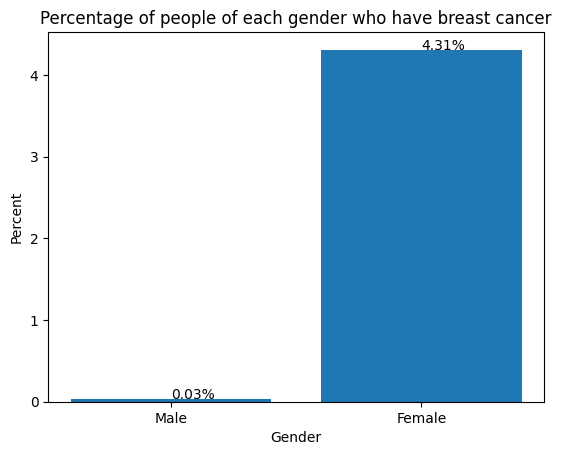

In [ ]:
#SEX related to Breast Cancer risk
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],str(y[i])+'%')
from matplotlib import pyplot as plt
x = ["Male", "Female"]
y = [round(((breast_cancer["SEX_A"].value_counts()[1])/df["SEX_A"].value_counts()[1]),4)*100,round(((breast_cancer["SEX_A"].value_counts()[2])/df["SEX_A"].value_counts()[2]),4)*100]
plt.bar(x,y)
plt.title("Percentage of people of each gender who have breast cancer")
plt.xlabel("Gender")
plt.ylabel("Percent")
addlabels(x,y)


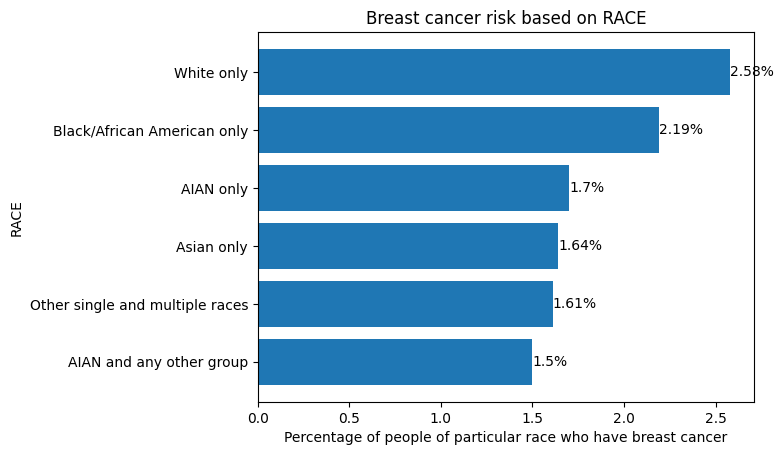

In [ ]:
#RACE related to Breast Cancer risk

x = ["White only", "Black/African American only", "Asian only", "AIAN only", "AIAN and any other group", "Other single and multiple races"]
y = [round((breast_cancer["RACEALLP_A"].value_counts()[1]/df["RACEALLP_A"].value_counts()[1])*100,2),
     round((breast_cancer["RACEALLP_A"].value_counts()[2]/df["RACEALLP_A"].value_counts()[2])*100,2),
     round((breast_cancer["RACEALLP_A"].value_counts()[3]/df["RACEALLP_A"].value_counts()[3])*100,2),
     round((breast_cancer["RACEALLP_A"].value_counts()[4]/df["RACEALLP_A"].value_counts()[4])*100,2),
     round((breast_cancer["RACEALLP_A"].value_counts()[5]/df["RACEALLP_A"].value_counts()[5])*100,2),
     round((breast_cancer["RACEALLP_A"].value_counts()[6]/df["RACEALLP_A"].value_counts()[6])*100,2)]


type_df = pd.DataFrame({"Race":x,
                  "Count":y})

df_sorted= type_df.sort_values('Count')
plt.barh("Race","Count", data=df_sorted)
plt.title("Breast cancer risk based on RACE")
plt.xlabel("Percentage of people of particular race who have breast cancer")
plt.ylabel("RACE")
for i, cnt in enumerate(df_sorted['Count']):
    plt.text(cnt, i, str(cnt)+'%', ha='left', va='center')

8518


Text(0, 0.5, 'Count')

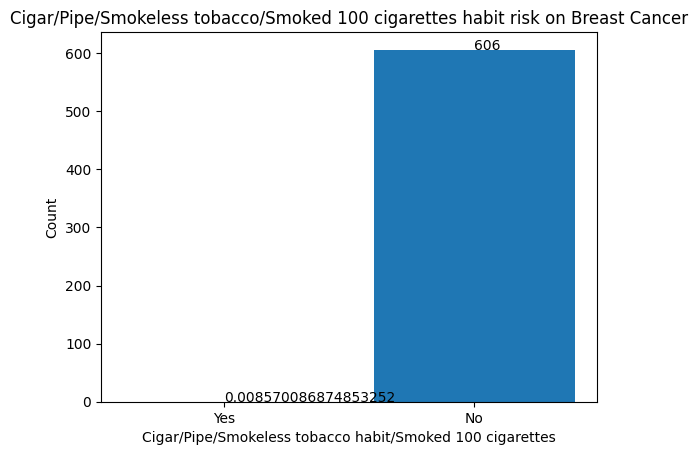

In [ ]:
#Cigar/Pipe/Smokeless tobacco habit/ Smoked 100 cigarettes risk on Breast Cancer
x = ["Yes", "No"]
y = [(breast_cancer['CIGAREV_A'].value_counts()[1] or breast_cancer['PIPEEV_A'].value_counts()[1] or breast_cancer['SMOKELSEV_A'].value_counts()[1] or breast_cancer['SMKEV_A'].value_counts()[1])/(df['CIGAREV_A'].value_counts()[1] or df['PIPEEV_A'].value_counts()[1] or df['SMOKELSEV_A'].value_counts()[1] or df['SMKEV_A'].value_counts()[1]),
     breast_cancer['CIGAREV_A'].value_counts()[2] or breast_cancer['PIPEEV_A'].value_counts()[2] or breast_cancer['SMOKELSEV_A'].value_counts()[2] or breast_cancer['SMKEV_A'].value_counts()[2]]

print((df['CIGAREV_A'].value_counts()[1] or df['PIPEEV_A'].value_counts()[1] or df['SMOKELSEV_A'].value_counts()[1] or df['SMKEV_A'].value_counts()[1]))

plt.bar(x,y)
plt.title("Cigar/Pipe/Smokeless tobacco/Smoked 100 cigarettes habit risk on Breast Cancer")
addlabels(x, y)
plt.xlabel("Cigar/Pipe/Smokeless tobacco habit/Smoked 100 cigarettes")
plt.ylabel("Count")

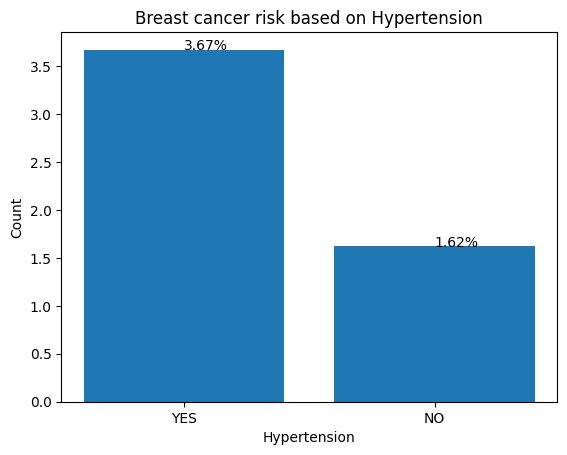

In [ ]:
#HYPERTENSION related to Top 5 Cancer risk

from matplotlib import pyplot as plt
x = ["YES", "NO"]
y = [round((breast_cancer["HYPEV_A"].value_counts()[1]/df["HYPEV_A"].value_counts()[1])*100,2),round((breast_cancer["HYPEV_A"].value_counts()[2]/df["HYPEV_A"].value_counts()[2])*100,2)]
plt.bar(x,y)
plt.title("Breast cancer risk based on Hypertension")
plt.xlabel("Hypertension")
plt.ylabel("Count")
addlabels(x,y)

Text(0.5, 1.0, 'Weight effect on Breast Cancer person')

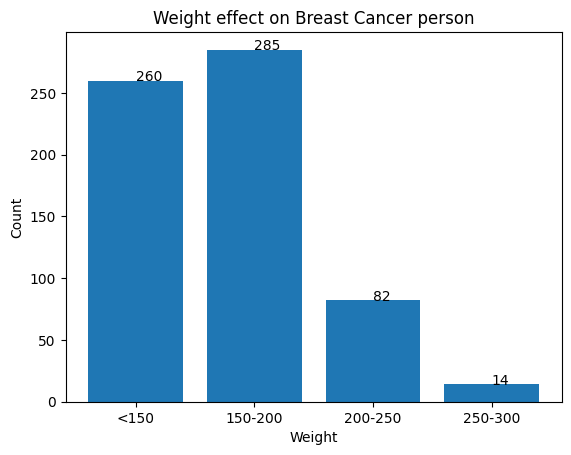

In [ ]:
#Weight Effect
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],str(y[i])+'%')
u150=0
u200=0
u250=0
u300=0
for i in top_cancer['WEIGHTLBTC_A']:
  if i<150:
    u150= u150+1
  elif i<200:
    u200= u200+1
  elif i<250:
    u250= u250+1
  elif i<300:
    u300 = u300+1

x = ["<150","150-200","200-250","250-300"]
y= [round(u150/len(data)*100,2),round(u200/len(data)*100,2),round(u250/len(data)*100,2),round(u300/len(data)*100,2)]
plt.bar(x,y)
addlabels(x,y)
plt.xlabel("Weight")
plt.ylabel("Count")
plt.title("Weight effect on Breast Cancer person")

Text(0, 0.5, 'Count')

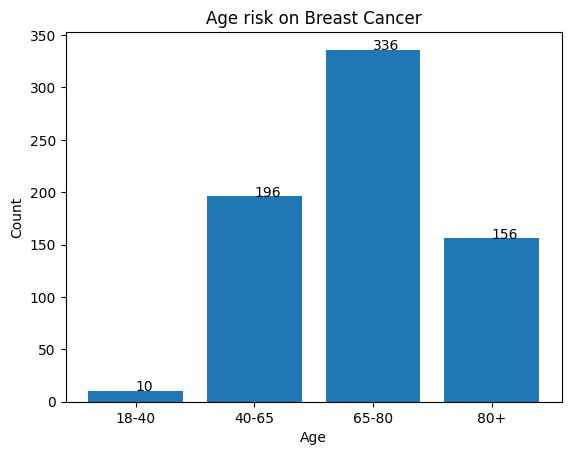

In [ ]:
#Age risk on Breast Cancer
u40=0
u65 = 0
u80 = 0
o80=0
for i in breast_cancer['AGEP_A']:
  if i<40:
    u40= u40+1
  elif i<65:
    u65 = u65+1
  elif i<80:
    u80 = u80+1
  else:
    o80 = o80+1

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

x = ["18-40", "40-65", "65-80", "80+"]
y = [u40,u65,u80,o80]
plt.bar(x,y)
plt.title("Age risk on Breast Cancer")
addlabels(x, y)
plt.xlabel("Age")
plt.ylabel("Count")


Text(0, 0.5, 'Count')

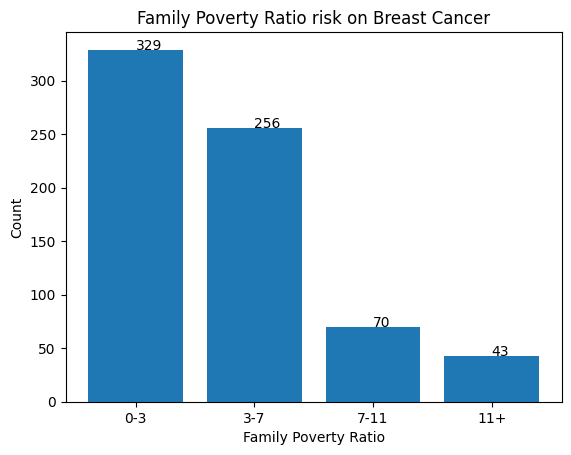

In [ ]:
#Family Poverty Ratio risk on Breast Cancer
u3=0
u7 = 0
u11 = 0
o11=0
for i in breast_cancer['POVRATTC_A']:
  if i<3:
    u3= u3+1
  elif i<7:
    u7 = u7+1
  elif i<11:
    u11 = u11+1
  else:
    o11 = o11+1

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

x = ["0-3", "3-7", "7-11", "11+"]
y = [u3,u7,u11,o11]
plt.bar(x,y)
plt.title("Family Poverty Ratio risk on Breast Cancer")
addlabels(x, y)
plt.xlabel("Family Poverty Ratio")
plt.ylabel("Count")


In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score, precision_recall_curve, roc_curve, auc
import seaborn as sns
import sklearn.metrics as metrics
import pandas as pd


X_train, X_test, y_train, y_test = train_test_split(data.drop('BREASCAN_A', axis=1), data['BREASCAN_A'], test_size=0.2, random_state=42)


model = DecisionTreeClassifier(max_depth=10)

# Performing training
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)


# Evaluate the accuracy of the classifier
accuracy = sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy*100)


# cm = confusion_matrix(y_test, y_pred)

# plt.figure(figsize=(6, 4))
# sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
# plt.title("Confusion Matrix")
# plt.xlabel("Predicted")
# plt.ylabel("True")
# plt.show()
# Calculate the recall
recall = recall_score(y_test, y_pred)
print("Recall/Sensitivity", recall)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# # Plot precision-recall curve
# plt.plot(recall, precision, marker='.')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Precision-Recall Curve')
# plt.grid(True)
# plt.show()

#ROC
decision_fpr, decision_tpr, thresholds = roc_curve(y_test, y_pred)
decision_roc_auc = auc(decision_fpr, decision_tpr)
print("ROC:", decision_roc_auc)






Accuracy: 85.8321870701513
Recall/Sensitivity 0.8278145695364238
Precision: 0.6188118811881188
ROC: 0.8470670069904341


In [ ]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import SelectFromModel
adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train the AdaBoost classifier
adaboost.fit(X_train, y_train)
y_pred = adaboost.predict(X_test)

accuracy = sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy*100)

# Calculate the recall
recall = recall_score(y_test, y_pred)
print("Recall", recall)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

#ROC
ada_fpr, ada_tpr, thresholds = roc_curve(y_test, y_pred)
ada_roc_auc = auc(ada_fpr, ada_tpr)
print("ROC:", ada_roc_auc)


Accuracy: 87.89546079779917
Recall 0.6688741721854304
Precision: 0.7266187050359713
ROC: 0.8014509749816042


In [ ]:
# ANN
import tensorflow as tf
from sklearn.metrics import accuracy_score
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(234,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Make predictions
y_pred = model.predict(X_test)

# Convert predicted probabilities to binary labels
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate accuracy, recall, precision
accuracy = accuracy_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)


#ROC
ann_fpr, ann_tpr, thresholds = roc_curve(y_test, y_pred)
ann_roc_auc = auc(ann_fpr, ann_tpr)
print("ROC:", ann_roc_auc)


Epoch 1/10
91/91 [==============================] - 1s 2ms/step - loss: 33.5852 - accuracy: 0.6773
Epoch 2/10
91/91 [==============================] - 0s 2ms/step - loss: 2.4563 - accuracy: 0.6997
Epoch 3/10
91/91 [==============================] - 0s 2ms/step - loss: 2.1676 - accuracy: 0.7021
Epoch 4/10
91/91 [==============================] - 0s 2ms/step - loss: 1.7689 - accuracy: 0.7190
Epoch 5/10
91/91 [==============================] - 0s 2ms/step - loss: 0.9728 - accuracy: 0.7197
Epoch 6/10
91/91 [==============================] - 0s 2ms/step - loss: 1.2420 - accuracy: 0.7132
Epoch 7/10
91/91 [==============================] - 0s 2ms/step - loss: 1.4378 - accuracy: 0.7149
Epoch 8/10
91/91 [==============================] - 0s 2ms/step - loss: 1.5621 - accuracy: 0.7183
Epoch 9/10
91/91 [==============================] - 0s 2ms/step - loss: 0.9348 - accuracy: 0.7410
Epoch 10/10
23/23 [==============================] - 0s 1ms/step
Accuracy: 0.7647867950481431
Recall: 0.0860927152317

In [ ]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()

# Train the classifier
naive_bayes.fit(X_train, y_train)

# Make predictions on the test set
y_pred = naive_bayes.predict(X_test)


accuracy = sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy*100)

# Calculate the recall
recall = recall_score(y_test, y_pred)
print("Recall", recall)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

#ROC
nb_fpr, nb_tpr, thresholds = roc_curve(y_test, y_pred)
nb_roc_auc = auc(nb_fpr, nb_tpr)
print("ROC:", nb_roc_auc)

Accuracy: 84.73177441540578
Recall 0.5960264900662252
Precision: 0.6428571428571429
ROC: 0.7546104672553348


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy*100)

# Calculate the recall
recall = recall_score(y_test, y_pred)
print("Recall", recall)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

#ROC
knn_fpr, knn_tpr, thresholds = roc_curve(y_test, y_pred)
knn_roc_auc = auc(knn_fpr, knn_tpr)
print("ROC:", knn_roc_auc)


Accuracy: 75.10316368638239
Recall 0.12582781456953643
Precision: 0.27941176470588236
ROC: 0.520379185062546


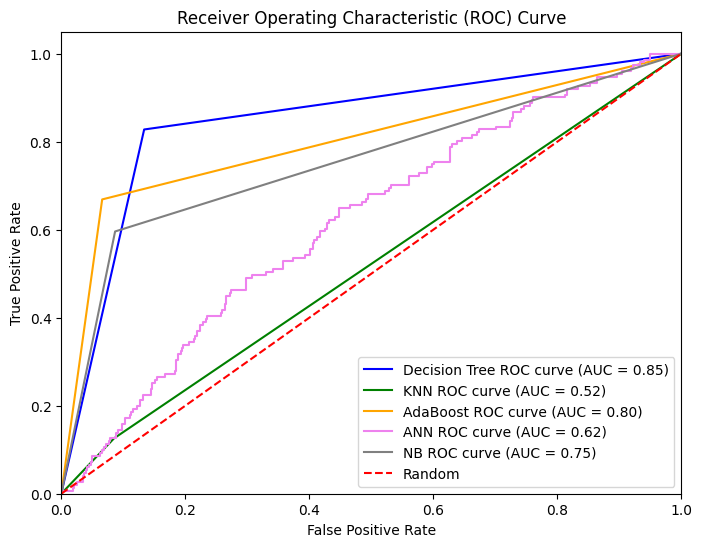

In [ ]:
# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(decision_fpr, decision_tpr, color='blue', label='Decision Tree ROC curve (AUC = %0.2f)' % decision_roc_auc)
plt.plot(knn_fpr, knn_tpr, color='green', label='KNN ROC curve (AUC = %0.2f)' % knn_roc_auc)
plt.plot(ada_fpr, ada_tpr, color='orange', label='AdaBoost ROC curve (AUC = %0.2f)' % ada_roc_auc)
plt.plot(ann_fpr, ann_tpr, color='violet', label='ANN ROC curve (AUC = %0.2f)' % ann_roc_auc)
plt.plot(nb_fpr, nb_tpr, color='grey', label='NB ROC curve (AUC = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()